In [1]:
import pandas as pd

input_file_path  = 'PHAGE_BUBBLE/IBD_Norman_2015/phage_comp_59_resolved_genome_info.txt'
output_file_path = 'PHAGE_BUBBLE/IBD_Norman_2015/phage_comp_59_resolved_genome_info.tsv'
# Open the input TXT file for reading
with open(input_file_path, 'r') as txt_file:
    # Read the content of the TXT file
    txt_content = txt_file.readlines()

# Create a new TSV file for writing
with open(output_file_path, 'w') as tsv_file:
    for line in txt_content:
        # Split each line in the TXT file using a space as the delimiter
        columns = line.strip().split()  # You can use any delimiter you need

        # Join the columns with tabs and write to the TSV file
        tsv_line = '\t'.join(columns)
        tsv_file.write(tsv_line + '\n')


In [43]:
import pandas as pd

def isolating_edges_dictionary(txt):
    # Preprocess the TSV file to remove spaces within the string representation of lists
    path_edge_dict = {}
    # Open the file for reading
    with open(txt, "r") as file:
        # Read the file line by line
        lines = file.readlines()

    # Iterate through the lines, starting from the second line (assuming there is a header)
    for line in lines[1:]:
        # Split the line into columns based on tab delimiter
        columns = line.strip().split('\t')
        # Extract the contentNodeorder column (assuming it's the last column)
        edge_column = columns[-1]
        path_column = columns[0]
        # print(edge_column)
        # Use the eval() function to safely evaluate the contentNodeorder as a Python list
        edge_array = eval(edge_column)
        path_edge_dict[path_column] = edge_array
    return path_edge_dict

path_edge_dict_ALL = isolating_edges_dictionary('PHAGE_BUBBLE/2022_IBD_all/resolved_genome_info.txt')

In [221]:
def Path_to_edges_dictionary(Specified_comp):
    path_edge_dict = {}
    for component in path_edge_dict_ALL.keys():
        if f'{Specified_comp}_cycle' in component:
            List_edges = path_edge_dict_ALL[component]
            path_edge_dict[component] = List_edges
    return path_edge_dict

def Different_dict_generator(Specified_comp):
    path_edge_dict = Path_to_edges_dictionary(Specified_comp)
    Different_Dict = {}
    for k in range(len(path_edge_dict)): # Comparing all paths, using 2 increasing intergers k and n. 
        for n in range(len(path_edge_dict)+1):
            if k < n: 
                if len(path_edge_dict) > n:
                    # print(f"Comparing Path{k+1} and Path{n+1}")
                    path_1 = list(path_edge_dict.keys())[k]
                    path_2 = list(path_edge_dict.keys())[n]
                    Y = path_edge_dict[list(path_edge_dict.keys())[n]]
                    X = path_edge_dict[list(path_edge_dict.keys())[k]]
                    # Convert the arrays to sets for efficient set operations
                    set_X = set(X)
                    set_Y = set(Y)

                    # Compute the difference between the sets to remove common elements
                    unique_values_X = list(set_X.difference(set_Y))
                    unique_values_Y = list(set_Y.difference(set_X))
                    # Print the result
                    Different_Dict[f"Comparing {path_1} and {path_2}"] = {path_1 : unique_values_X, path_2 : unique_values_Y}
    return Different_Dict

def All_unique_edges_generator(Different_dict):
    All_unique_edges = []
    for comparison, unique_edges_from_paths in Different_dict.items():
        Edges_from_paths = [edges for paths, edges in unique_edges_from_paths.items()]
        All_unique_edges.append(Edges_from_paths)
    
    # Since the arrays have different length, extend.array does not work
    # Turn forming a set to store value without duplicates:
    unique_values = set()
    # Iterate through the nested list
    for sublists in All_unique_edges:
        for sublist in sublists:
            for item in sublist:
                unique_values.add(item)

    # Convert the set back to a list (if needed)
    All_unique_edges = list(unique_values)
    return All_unique_edges

# txt_file = "PHAGE_BUBBLE/IBD_Norman_2015/phage_comp_59_resolved_genome_info.txt"
# path_edge_dict_1 = isolating_edges_dictionary('PHAGE_BUBBLE/IBD_Norman_2015/phage_comp_59_resolved_genome_info.txt')
Path_edge = Path_to_edges_dictionary('phage_comp_5')
print(Path_edge)
# Unique_dict = All_unique_edges_generator(Different_dict)
# print(Unique_dict)

{'phage_comp_5_cycle_3': ['edge_137982-', 'edge_2656-', 'edge_2668-', 'edge_2666-', 'edge_2665-', 'edge_2664-', 'edge_2662-', 'edge_137984-', 'edge_2661-', 'edge_137983-', 'edge_2658-'], 'phage_comp_5_cycle_2': ['edge_137982-', 'edge_2668-', 'edge_2665-', 'edge_2663-', 'edge_137984-', 'edge_2661-', 'edge_137983-', 'edge_2657-'], 'phage_comp_5_cycle_1': ['edge_137982-', 'edge_2668-', 'edge_2665-', 'edge_2662-', 'edge_137984-', 'edge_2660-', 'edge_137983-', 'edge_2657-']}


In [176]:
from Bio import SeqIO
def Find_genome_Sequence_and_File_location_of_COMP(Specified_comp): 
    Genome_file_list = {}
    for comp in path_edge_dict_ALL.keys():
        # print(comp)
        if f'{Specified_comp}_cycle' in comp:
            Genome_file_list[comp] = {}
            Genome_file_list[comp]['file'] = f'PHAGE_BUBBLE/2022_IBD_all/resolved_phages/{comp}.fasta'
            for record in SeqIO.parse(f'PHAGE_BUBBLE/2022_IBD_all/resolved_phages/{comp}.fasta', 'fasta'):
                Genome_file_list[comp]['genome'] = str(record.seq)
    return Genome_file_list

print(Find_genome_Sequence_and_File_location_of_COMP('phage_comp_10'))

{'phage_comp_10_cycle_1': {'file': 'PHAGE_BUBBLE/2022_IBD_all/resolved_phages/phage_comp_10_cycle_1.fasta', 'genome': Seq('ATTTTTAAACATAAATCATTAACATATAATCTGAAATTATTTTTCCGTATCTAA...AAA')}, 'phage_comp_10_cycle_3': {'file': 'PHAGE_BUBBLE/2022_IBD_all/resolved_phages/phage_comp_10_cycle_3.fasta', 'genome': Seq('ATTTTTAAACATAAATCATTAACATATAATCTGAAATTATTTTTCCGTATCTAA...AAA')}, 'phage_comp_10_cycle_6': {'file': 'PHAGE_BUBBLE/2022_IBD_all/resolved_phages/phage_comp_10_cycle_6.fasta', 'genome': Seq('ATTTTTAAACATAAATCATTAACATATAATCTGAAATTATTTTTCCGTATCTAA...ACA')}}


In [202]:
All_Contigs = 'PHAGE_BUBBLE/edges.fasta'
def contig_sequence_genome_record(Unique_dict):
    contig_record = {}
    for record in SeqIO.parse(All_Contigs, 'fasta'):
        for edges in Unique_dict:
            if record.id in edges:
                if edges.endswith('+'):
                    contig_record[edges] = str(record.seq)
                else: 
                    contig_record[edges] = str(Seq(record.seq).reverse_complement())
    return contig_record

In [296]:
import re
def Find_position_and_read_depth(targeted_contig_list, Component_ID, patient, specified_comp, Genome_file_list):
    with open(f"Time_series/Sample_output/{patient}_sample_output.txt", "r") as file: 
        line = file.read().splitlines()
    File = line
    path_edge_dictionary = {}
    for component in path_edge_dict_ALL.keys():
        if Component_ID == component:
            List_edges = path_edge_dict_ALL[component]
            path_edge_dictionary[component] = List_edges
            
    All_Edges_list_Comp_ID = path_edge_dictionary[Component_ID]
    Edges_genome_dictionary = contig_sequence_genome_record(All_Edges_list_Comp_ID)
    
    Read_depth_list = []
    contig_dict = contig_sequence_genome_record(targeted_contig_list)
    
    start_pos_Edge_dict = start_pos_Edge_dict_generator(Component_ID, All_Edges_list_Comp_ID, Edges_genome_dictionary)
    
    for bamfile_name in File:
        with pysam.AlignmentFile(f"Time_series/Patient_sample/{patient}/{specified_comp}/{bamfile_name}_all_paths_sorted.bam","rb") as bamfile:
            list_of_edges_RD = []
            
            for targeted_contig in targeted_contig_list:
                # print(targeted_contig)
                length_contig = len(contig_dict[targeted_contig])
                
                start_location = start_pos_Edge_dict[targeted_contig]
                # print(start_location)
                end_location = start_location + length_contig

                read_depth_value_of_target_edge = find_read_depth(bamfile, Component_ID, start_location, end_location)      
                # print(read_depth_value_of_target_edge)
                list_of_edges_RD.append(read_depth_value_of_target_edge)  
                # print(list_of_edges_RD)
        Average_read_depth = (sum(list_of_edges_RD) / len(list_of_edges_RD))
        Read_depth_list.append(Average_read_depth)
  
    return Read_depth_list


def find_read_depth(bamfile, contig, start, end):
    Read = []
    for pileupcolumn in pileup_truncated(bamfile, contig, start, end):
        Read.append(pileupcolumn.n) 
    Sum_read = sum(Read)
    genome_length = end - start
    read_depth = Sum_read / genome_length
    return read_depth

def start_pos_Edge_dict_generator(Component_ID, All_Edges_list_Comp_ID, Edges_genome_dict):
    start = 0
    Start_pos_edge_dict = {}
    for edges in All_Edges_list_Comp_ID:
        targeted_edge_genome = Edges_genome_dict[edges]
        if not Start_pos_edge_dict:
            start = 0
            Start_pos_edge_dict[edges] = start
        else: 
            start += len(targeted_edge_genome)
            Start_pos_edge_dict[edges] = start
    return Start_pos_edge_dict


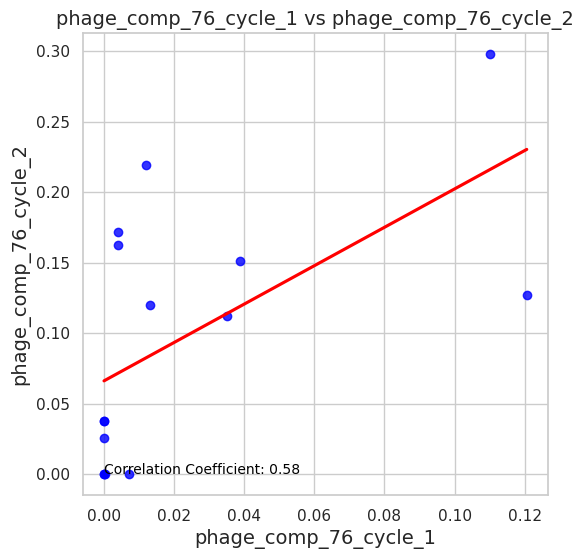

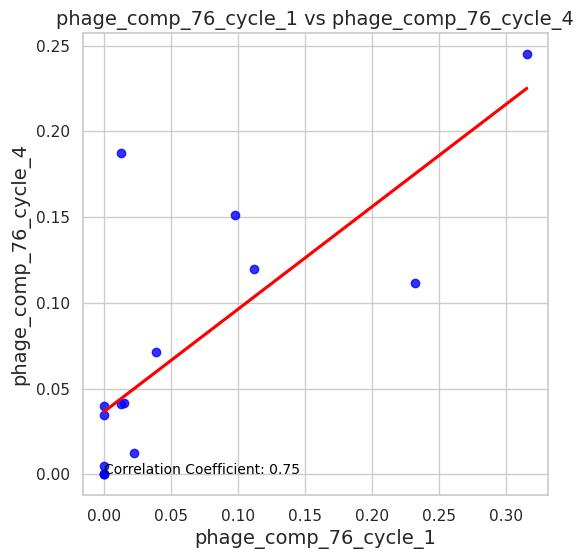

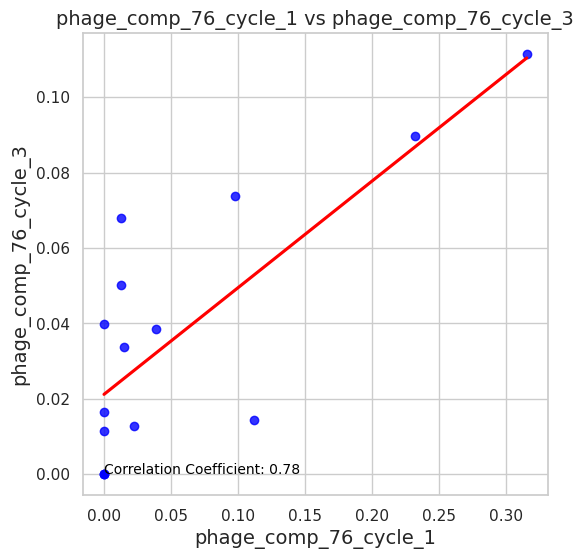

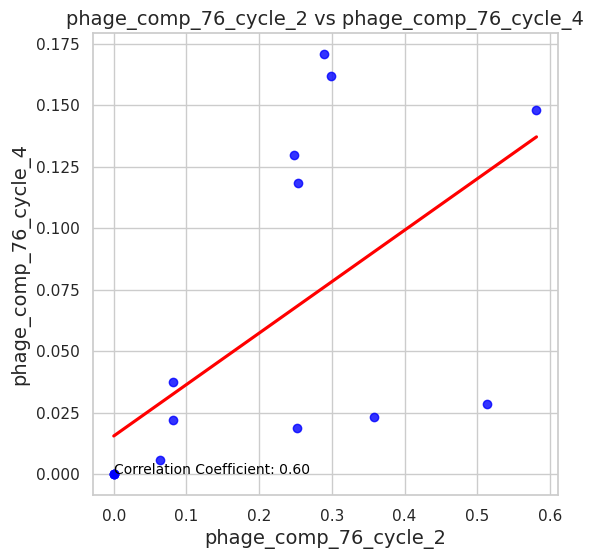

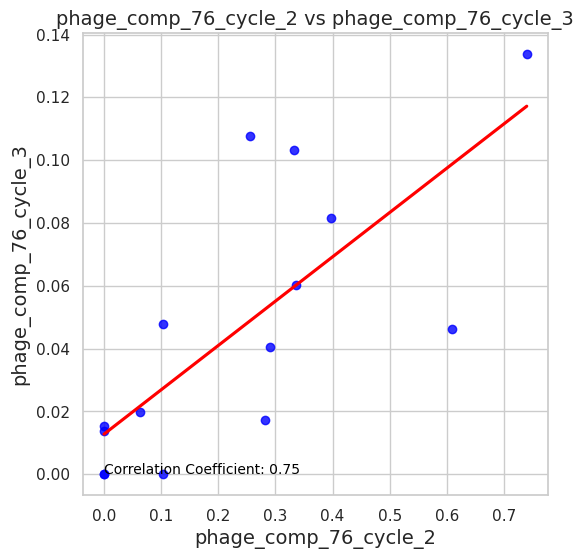

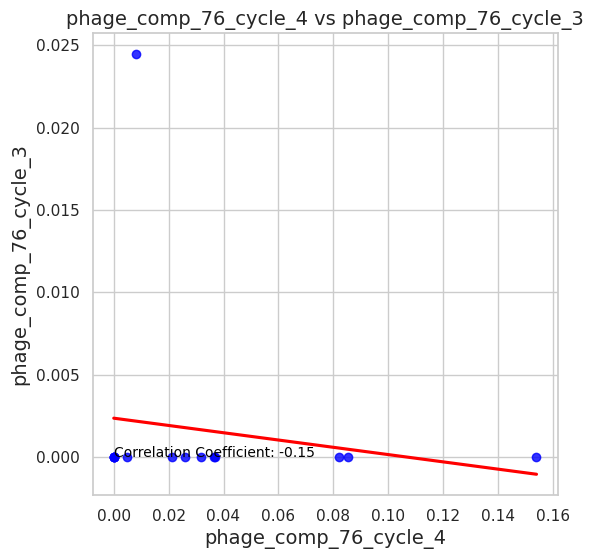

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def Read_depth_dictionary_new_generator(patient, specified_comp):
    # Record the genome sequences of all the apths and also its location in the dataset. 
    Genome_file_list_new = Find_genome_Sequence_and_File_location_of_COMP(specified_comp)
    # print(Genome_file_list_new)
    # Creating a dictionary that isolate all the different Edges in pair-wise comparison for a specified component:
    Different_dict_1 = Different_dict_generator(specified_comp)
    # print(Different_dict_1)
    Read_depth_dictionary_new = {}
    int_order = 0
    for k in range(len(Genome_file_list_new)): # Comparing all paths, using 2 increasing intergers k and n. 
        for n in range(len(Genome_file_list_new)+1):
            if k < n: 
                if len(Genome_file_list_new) > n:
                    # path 1 represent the the first (in order) component_contigs name in term of the position in the path_edge_dict
                    # as n and k increases, it will represent the position of others component_contigs
                    path_1 = list(Genome_file_list_new.keys())[k]
                    path_2 = list(Genome_file_list_new.keys())[n]
                    
                    # print(path_1)
                    # print(path_2)
                    # This code create a unique list of contigs for Path 1st or Path 2nd. 
                    targeted_contig_X_axis = Different_dict_1[list(Different_dict_1.keys())[int_order]][path_1]
                    # print(list(Different_dict_1.keys())[int_order])
                    targeted_contig_Y_axis = Different_dict_1[list(Different_dict_1.keys())[int_order]][path_2]
                    int_order += 1
                    # print(targeted_contig_X_axis)
                    # print(targeted_contig_Y_axis)
                # Creating a list of all read_depth of Path 1st (X-axis) and Path 2nd (Y-axis).
                X_axis = Find_position_and_read_depth(targeted_contig_X_axis, path_1, patient, specified_comp, Genome_file_list_new)
                Y_axis = Find_position_and_read_depth(targeted_contig_Y_axis, path_2, patient, specified_comp, Genome_file_list_new)
                # print(int_order)
                    
                Read_depth_dictionary_new[f'{path_1} vs {path_2}'] = {}
                Read_depth_dictionary_new[f'{path_1} vs {path_2}'][path_1] = X_axis
                Read_depth_dictionary_new[f'{path_1} vs {path_2}'][path_2] = Y_axis
    return Read_depth_dictionary_new

                
def graphing_read_depth_seaborn(patient, Read_depth_dictionary_new):
    for int_order in range(len(Read_depth_dictionary_new)):
        X_Y_axis_dict = Read_depth_dictionary_new[list(Read_depth_dictionary_new.keys())[int_order]] 
        path_1 = list(X_Y_axis_dict.keys())[0]
        path_2 = list(X_Y_axis_dict.keys())[1]
        X_axis = X_Y_axis_dict[path_1]
        Y_axis = X_Y_axis_dict[path_2]
        
        data = pd.DataFrame({'X': X_axis, 'Y': Y_axis})
        
        # Create a scatter plot with custom styling
        sns.set(style='whitegrid')
        plt.figure(figsize=(6,6))  # Set figure size
        # sns.scatterplot(data=data, x='X', y='Y', s=100, color='blue', alpha=0.7, edgecolor='black', linewidth=1)
        sns.regplot(x='X', y='Y', data=data, ci=None, line_kws={"color": 'red'}, scatter_kws={"color": 'blue'})
        correlation_coefficient = np.corrcoef(X_axis, Y_axis)[0, 1]
        plt.text(0, 0, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=10, color='black')

        # Set labels for the axes and title
        plt.xlabel(f'{path_1}', fontsize=14)
        plt.ylabel(f'{path_2}', fontsize=14)
        plt.title(f'{path_1} vs {path_2}', fontsize=14)
        plt.savefig(f"PHAGE_BUBBLE/Image_ReadDepth/{path_1} vs {path_2} of {patient}.png")
        
        plt.show()
        

patient = '1012A'
component = 'phage_comp_76'

# # Comp_73:
# Read_depth_dictionary_phage_comp_76 = Read_depth_dictionary_new_generator(patient, 'phage_comp_76')
# graphing_read_depth_seaborn(patient, component, Read_depth_dictionary_phage_comp_73)
# Read_depth_dictionary_comp76 = Read_depth_dictionary_new_generator(patient, component)
graphing_read_depth_seaborn(patient, Read_depth_dictionary_phage_comp_76)


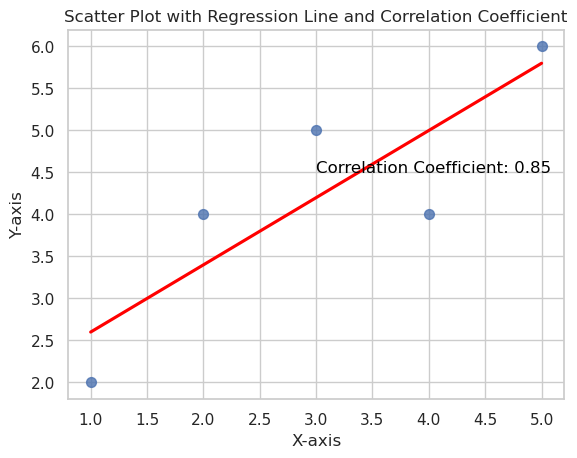

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 6]

# Create a scatter plot with regression line
sns.regplot(x=x, y=y, color='b', scatter_kws={'s': 50}, line_kws={'color': 'red'}, ci=None)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]

# Display the correlation coefficient on the plot
plt.text(3, 4.5, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='black')

# Customize the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Regression Line and Correlation Coefficient')

# Show the plot
plt.show()
